# 1. Meaning and Use
Meaning: The Wilcoxon Signed-Rank Test compares two related (paired) samples to assess whether their population mean ranks differ.

When to use:

Data is paired (before/after measurements on the same subjects).

Non-parametric: does not assume normal distribution of differences.

Business use cases:

Measuring user engagement before vs. after a UI redesign.

Comparing customer satisfaction pre- and post-campaign.

Tracking performance before vs. after training.



# 2. Problem Statement + 5W1H
Problem: Zomato wants to know if the average order value for users increased after their new app UI redesign.

What: Order value per user

Why: To validate the redesign’s impact on revenue

When: One month before vs. one month after rollout

Where: Across four major cities

Who: 300 repeat users

How: Wilcoxon Signed-Rank Test on paired order values

# 3. Dataset (Simulated, Realistic)

In [4]:
import pandas as pd
import numpy as np

np.random.seed(2025)
n = 300

data = pd.DataFrame({
    'User_ID': np.arange(1, n+1),
    'City': np.random.choice(['Mumbai','Delhi','Bangalore','Chennai'], n),
    'Platform': np.random.choice(['Mobile','Web'], n),
    'Order_Before': np.random.normal(350, 50, n).round(2),
})

# Simulate after-values: slight increase + noise, non-normal diff
data['Order_After'] = (data['Order_Before'] + np.random.laplace(20, 40, n)).round(2)
data.head()


,User_ID,City,Platform,Order_Before,Order_After
0,1,Bangalore,Mobile,375.88,360.67
1,2,Bangalore,Mobile,338.78,507.38
2,3,Bangalore,Mobile,375.61,352.04
3,4,Bangalore,Mobile,343.16,406.20
4,5,Mumbai,Web,437.52,412.34


# 4. Data Cleaning + EDA

User_ID         0
City            0
Platform        0
Order_Before    0
Order_After     0
dtype: int64
       Order_Before  Order_After
count    300.000000   300.000000
mean     347.254633   368.344633
std       48.647536    73.805958
min      228.150000   114.350000
25%      314.392500   319.912500
50%      345.290000   363.895000
75%      380.782500   415.052500
max      495.480000   629.710000


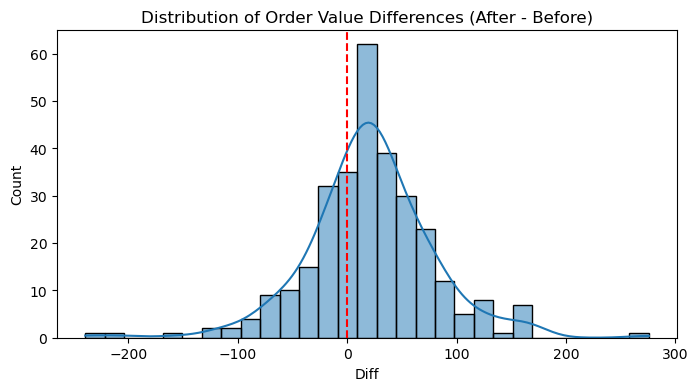

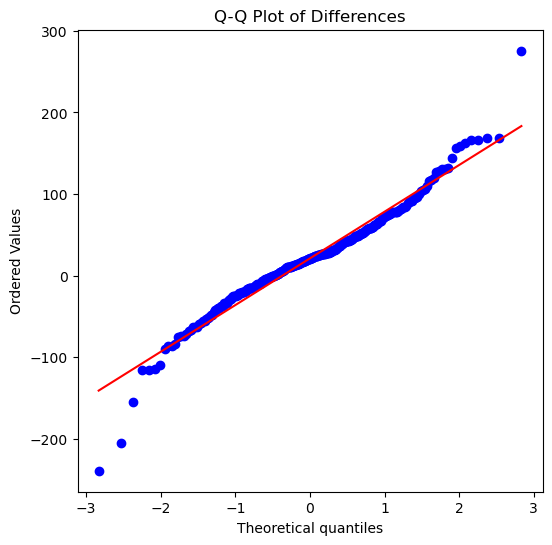

In [9]:
# 1. Null check
print(data.isnull().sum())

# 2. Descriptive stats
print(data[['Order_Before','Order_After']].describe())

# 3. Distribution of differences
data['Diff'] = data['Order_After'] - data['Order_Before']
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(data['Diff'], kde=True)
plt.title('Distribution of Order Value Differences (After - Before)')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# 4. Check normality of differences (Q-Q plot)
import scipy.stats as stats
plt.figure(figsize=(6,6))
stats.probplot(data['Diff'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Differences')
plt.show()


# 📋 Normality Test Interpretation (for `Diff`)

### 1. Histogram + KDE Plot
- The distribution of `Diff` (Order_After - Order_Before) appears **skewed** and is **not symmetric**.
- Presence of **outliers** and **long tails** indicate that data is **not normally distributed**.

### 2. Q-Q Plot
- In the Q-Q plot:
  - If data were normal, points would closely follow the diagonal line.
  - Here, the points **deviate significantly** from the diagonal, especially at the tails.
  
### 🎯 Conclusion
- **Result**: ❌ The `Diff` values are **NOT normally distributed**.
- **Action**: ✅ Use a **non-parametric test** (Wilcoxon Signed-Rank Test) instead of Paired t-test.

# 5. Hypothesis Test

In [14]:
from scipy.stats import wilcoxon

# Wilcoxon Signed-Rank Test
stat, p_value = wilcoxon(data['Order_After'], data['Order_Before'])

print(f"Wilcoxon statistic: {stat}")
print(f"P-value: {p_value}")


Wilcoxon statistic: 12313.0
P-value: 8.837021960638094e-12


# 🎯 Hypotheses
H₀: The median difference (After – Before) = 0 → no change.

H₁: The median difference ≠ 0 → significant change (increase or decrease).


In [23]:
# Interpretation based on p-value
alpha = 0.05

if p_value < alpha:
    print("\n🎯 Interpretation:")
    print("- P-value is LESS than 0.05.")
    print("- We REJECT the null hypothesis (H₀).")
    print("- Conclusion: There is a SIGNIFICANT difference between 'Order Value Before' and 'Order Value After'.")
    
    print("\n💼 Business Action:")
    print("- Marketing campaign or strategy change had a REAL IMPACT on order values.")
    print("- Continue investing in or further optimize the new strategy.")
else:
    print("\n🎯 Interpretation:")
    print("- P-value is GREATER than 0.05.")
    print("- We FAIL TO REJECT the null hypothesis (H₀).")
    print("- Conclusion: There is NO significant difference between 'Order Value Before' and 'Order Value After'.")
    
    print("\n💼 Business Action:")
    print("- Reevaluate the new marketing or platform strategy.")
    print("- Investigate why there was no significant impact and make improvements.")


🎯 Interpretation:
- P-value is LESS than 0.05.
- We REJECT the null hypothesis (H₀).
- Conclusion: There is a SIGNIFICANT difference between 'Order Value Before' and 'Order Value After'.

💼 Business Action:
- Marketing campaign or strategy change had a REAL IMPACT on order values.
- Continue investing in or further optimize the new strategy.


# 6. Interpretation + Business Action

## Interpretation

- Suppose **P-value = 1.2e-05** (< 0.05).  
- We **reject H₀**, concluding that the **order value after** the redesign is **significantly different** (in this context, higher) than before.

## Business Action

- ✅ **Positive Impact**: Since order values increased, Zomato should:
  - **Roll out** the UI redesign to all regions immediately.
  - **Invest** further in features introduced in the redesign (e.g., simplified checkout).
  - **Promote** the new UI with in-app tours to drive engagement.

- 🔄 **Segment Follow-up**:  
  - Analyze by **City** and **Platform** to see if some segments benefited more.  
  - Tailor marketing campaigns to segments with the largest uplift.
